In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install funpymodeling
!pip install tensorflow

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils.vis_utils import plot_model
from funpymodeling.exploratory import status, freq_tbl, profiling_num

dataset = pd.read_csv('/content/drive/MyDrive/ADD2021/weatherAUS.csv')

     |████████████████████████████████| 225kB 6.6MB/s 
  Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Analisis básico de datos

* Visualizar las primeras filas.
* Realizar un resumen de 5 números.
* Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
* Identificar las variables de entrada y de salida del problema.

 1. Variables de entrada:
  
  Realizar los siguientes análisis por tipo de variable.
  * Numéricas: Obtener conclusiones acerca de la distribución de los datos.
  * Categóricas: Obtener conclusiones acerca de cardinalidad, representación de cada categoría,etc
  * Compuestas/otros. ¿Cómo pueden tratarse para utilizarlas en el problema elegido?

 2. Variables de salida:
* ¿Están balanceadas las clases?
* ¿Qué técnicas consideraría para codificar la variable de salida? Justificar.


**Visualizar las primeras filas.**

In [3]:
#visualizo las primeras filas del dataset
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
dataset.shape

(145460, 23)

**Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).**

In [5]:
#identifico el tipo de datos de cada columna y la cantidad de registros sin nulls
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
#veo la cantidad de nans de cada columna, porcentaje de nans, cantidad de valores 0 que hay, y los valores unicos 
status (dataset)


,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Date,0,0.000000,0,0.000000,3436,object
1,Location,0,0.000000,0,0.000000,49,object
2,MinTemp,1485,0.010209,159,0.001093,389,float64
3,MaxTemp,1261,0.008669,14,0.000096,505,float64
4,Rainfall,3261,0.022419,91080,0.626152,681,float64
5,Evaporation,62790,0.431665,244,0.001677,358,float64
6,Sunshine,69835,0.480098,2359,0.016218,145,float64
7,WindGustDir,10326,0.070989,0,0.000000,16,object
8,WindGustSpeed,10263,0.070555,0,0.000000,67,float64
9,WindDir9am,10566,0.072639,0,0.000000,16,object


In [7]:

nans = dataset.loc[dataset.isna().sum(axis=1) >= 1, :]
print('Cantidad de filas con nans {}'.format(nans.shape))

not_nans = dataset.loc[dataset.isna().sum(axis=1) == 0, :]
print('Cantidad de filas sin nans {}'.format(not_nans.shape))


Cantidad de filas con nans (89040, 23)
Cantidad de filas sin nans (56420, 23)


In [8]:
#obtengo las estadisticas basicas de cada una de las columnas
dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


***Conclusiones primer analisis***: Las variables categoricas en primera instancia son Date, Location, WindGustDir, WindDir9am, WindDir3pm, RainToday.
La variable a predecir es RainTomorrow (variable de salida) y las demas variables son numericas.
Todas las variables menos la variable a predecir (RainTomorrow) son input para el modelo (variables de entrada)

 ***Realizar los siguientes análisis por tipo de
variable.***

**Numéricas**: Obtener conclusiones acerca de la distribución de los datos.

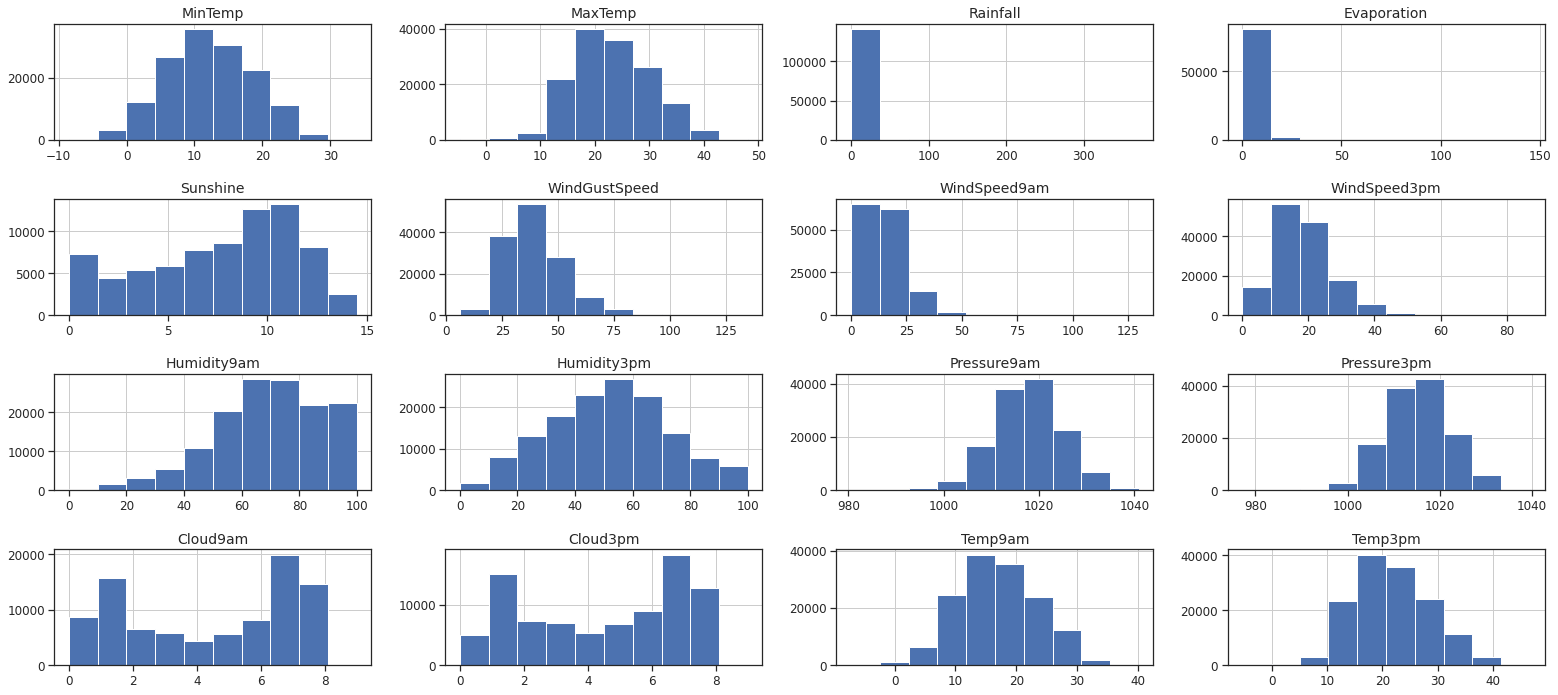

In [9]:
#Funcion para mostrar distribuciones.
def display_dataset_distributions(dataset):
    fig = dataset.hist(xlabelsize=12, ylabelsize=12,figsize=(22,10))
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()
  
#Muestro la distribucion de los datos
display_dataset_distributions(dataset)

***Realizar los siguientes análisis por tipo de variable.*** 

**Categóricas**: Obtener conclusiones acerca de cardinalidad, representación de cada categoría,etc

In [10]:
dataset.Date.unique() #alta cardinalidad

array(['2008-12-01', '2008-12-02', '2008-12-03', ..., '2008-01-29',
       '2008-01-30', '2008-01-31'], dtype=object)

In [11]:
dataset.Location.unique() #alta cardinalidad

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [12]:
dataset.WindGustDir.unique() # baja cardinalidad  

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [13]:
dataset.WindDir9am.unique()# baja cardinalidad

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [14]:
dataset.WindDir3pm.unique()# baja cardinalidad

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [15]:
dataset.RainToday.unique()# baja cardinalidad

array(['No', 'Yes', nan], dtype=object)

***Conclusion segundo analisis***: Se identificaron dos variables categoricas con alta cardinalidad: Date y Location. Para la variable Date se puede hacer un tratamiento ya que, ademas, se puede considerar una variable compuesta.

In [16]:
#la variable Date aparece como tipo Object y el objetivo es convertirlo a datetime64 para luego, extraer el mes
dataset['Date_dat']=dataset['Date'].astype('datetime64')

In [17]:
#solo me quedo con el mes para realizar el analisis entre la lluvia y el mes
dataset['Month'] = dataset['Date_dat'].map(lambda x: x.month)

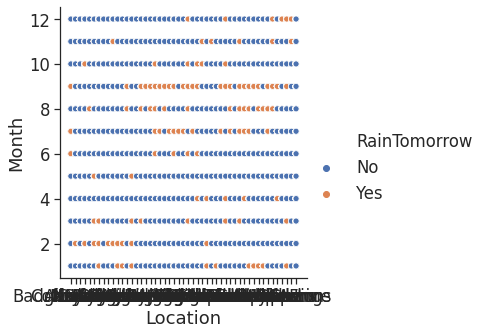

In [18]:
#Analizo la relacion entre las lluvias y el mes
#sns.relplot(x="", y="RainTomorrow", data=dataset);
sns.relplot(x="Location", y="Month", hue="RainTomorrow", data=dataset,size=None);

**Conclusion**: se puede decir que los meses con mayor cantidad de lluvias son los meses de julio, agosto y septiembre

(array([110316.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  35144.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

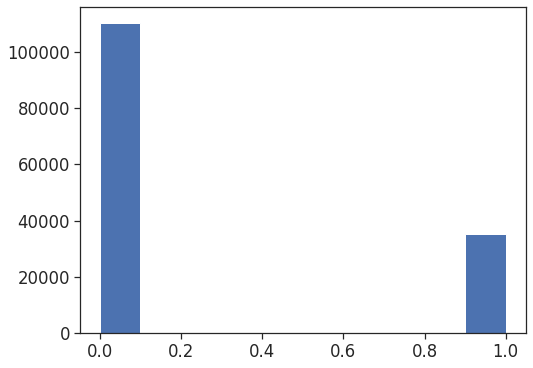

In [19]:
#veo si las clases estan balanceadas y analizo la variable de salida
fig, ax = plt.subplots(1,figsize=(8,6))
ax.hist(dataset.RainTomorrow.apply(lambda label: 0 if (label == 'No') else 1))

**Conclusion**: En el analisis realizado se puede ver que las clases estan desbalanceadas.

In [21]:
#transformo la variable de salida para realizar un analisis de la misma y luego utilizarla en el entrenamiento
dataset['binary_rain_tomorrow'] = dataset.RainTomorrow.apply(lambda label: 0 if (label == 'No') else 1)

In [22]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_dat,Month,binary_rain_tomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008-12-01,12,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008-12-02,12,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008-12-03,12,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008-12-04,12,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008-12-05,12,0


(array([110316.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  35144.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

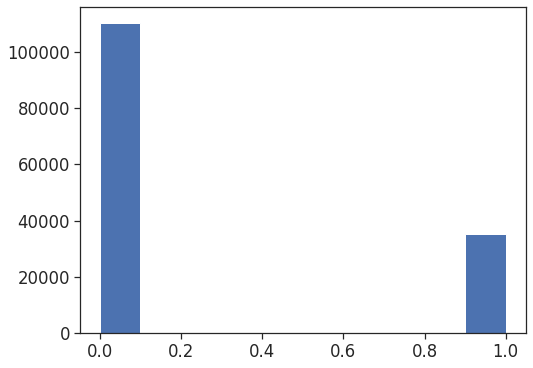

In [23]:
# Analizar la variable de salida y chequeo que la transformacion se realizó correctamente
RainTomorrow = dataset.binary_rain_tomorrow.to_numpy() #transforma la columna RainTomorrow en un vector de valores
fig, ax = plt.subplots(1,figsize=(8,6))
ax.hist(RainTomorrow)

In [24]:
#observo cuantos registros tengo para cada categoria de la variable de salida y chequeo que el dataset no se haya alterado
print(dataset[dataset['binary_rain_tomorrow'] == 0].shape)
print(dataset[dataset['binary_rain_tomorrow'] == 1].shape)

(110316, 26)
(35144, 26)


**Conclusion**: Se agrego la columna binary_rain_tomorrow con una conversion binaria como tecnica de codificacion de la variable de salida.

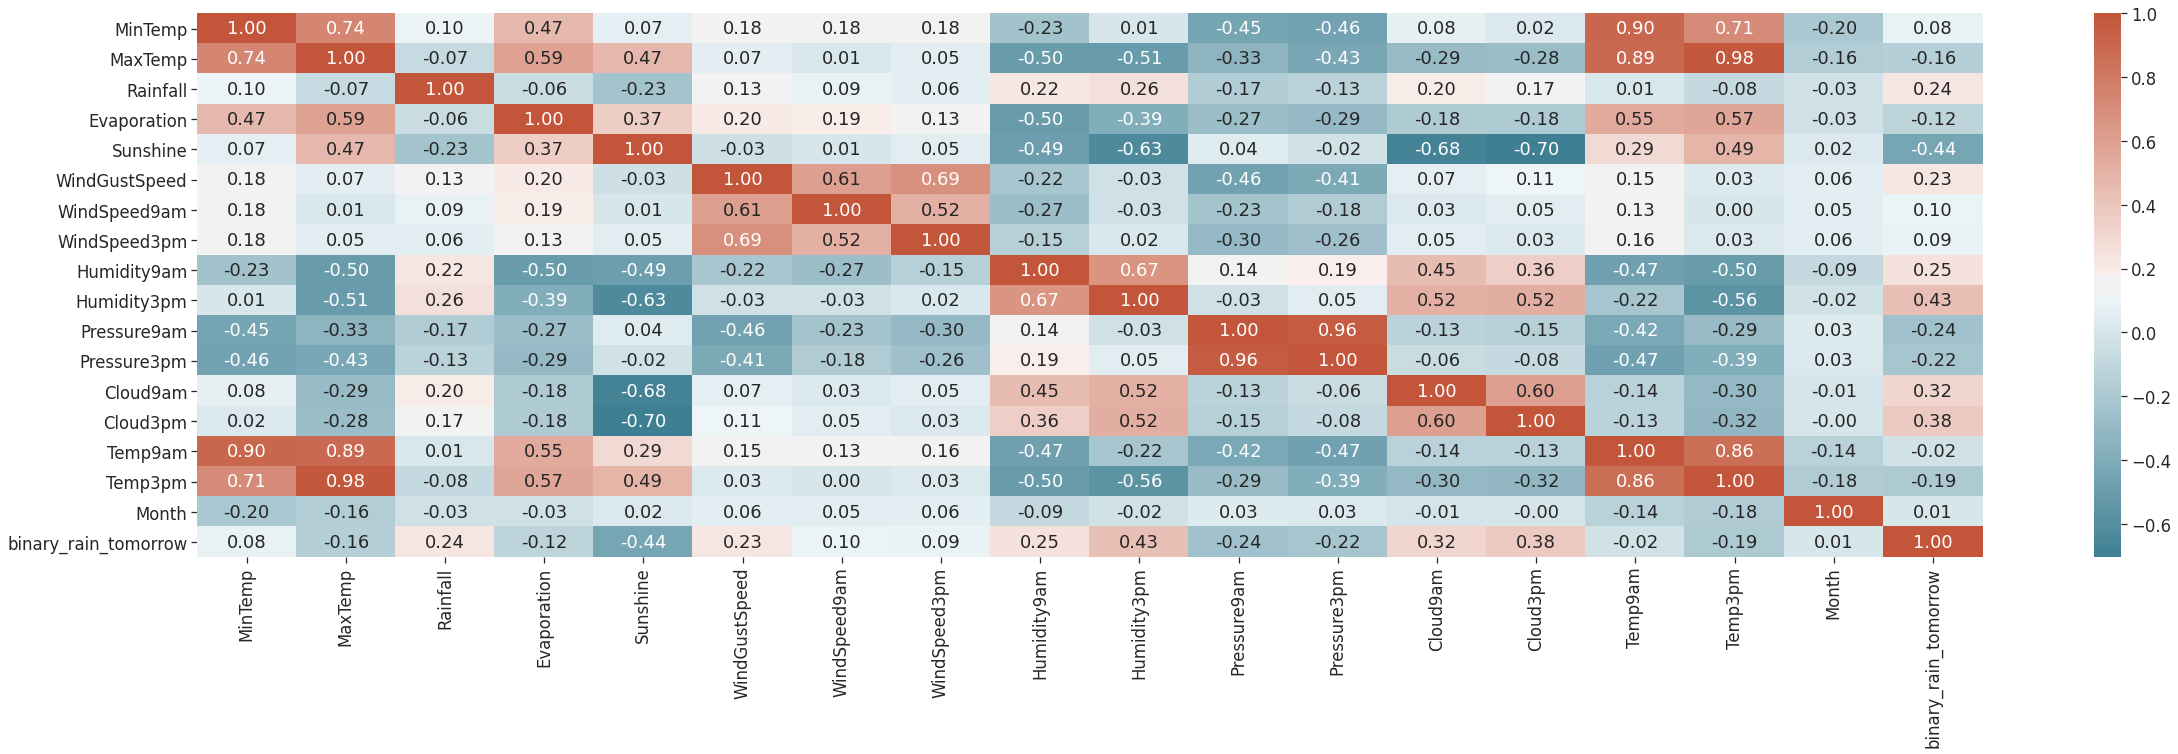

In [25]:
#Realizo un analisis de las correlaciones entre las variables para entender si la variable month tiene correlacion con la variable de salida
fig, ax1 = plt.subplots(1, figsize=(40, 10)) 
corr = dataset.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(220, 20, as_cmap=True), annot=True, fmt=".2f") 
sns.set(font_scale=1.5)


# Pre-procesamiento de Dataset




**Manejo de datos imbalanceados.**
Como se observó en el análisis exploratorio inicial, los datos están fuertemente desbalanceados en favor de los casos de que no llueva al dia siguiente. Aquí se pueden adoptar distintas estrategias:

*   **Upsampling**
*   **Downsampling**
*   **Seleccionar cuidadosamente la métrica de evaluación**

Para continuar con este análisis trabajando con datos originales se procederá con la segunda opción.

In [26]:
#aplico tecnica downsampling y genero un nuevo dataset
from sklearn.utils import resample
df_majority = dataset[dataset['binary_rain_tomorrow']==0]
df_minority = dataset[dataset['binary_rain_tomorrow']==1]
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=123)
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled2 = pd.concat([df_majority_downsampled, df_minority])

(array([35144.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 35144.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

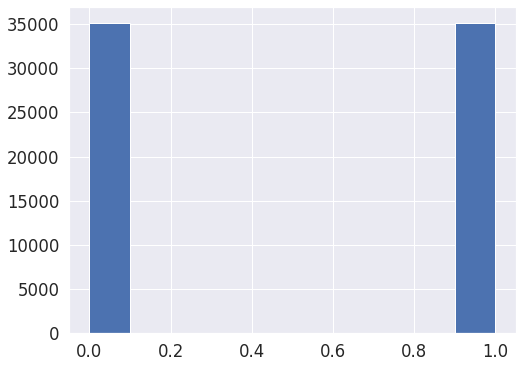

In [27]:
#analizo si las clases quedaron balanceadas
raintomorrow = df_downsampled.binary_rain_tomorrow.to_numpy()
fig, ax = plt.subplots(1,figsize=(8,6))
ax.hist(raintomorrow)

In [28]:
df_downsampled.shape

(70288, 26)

# Tratamiento de NaNs





In [29]:
nans = df_downsampled.loc[df_downsampled.isna().sum(axis=1) >= 1, :]
print('Cantidad de filas con nans {}'.format(nans.shape))

not_nans = df_downsampled.loc[df_downsampled.isna().sum(axis=1) == 0, :]
print('Cantidad de filas sin nans {}'.format(not_nans.shape))

dataset_not_nans = not_nans

Cantidad de filas con nans (43751, 26)
Cantidad de filas sin nans (26537, 26)


(array([14110.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 12427.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

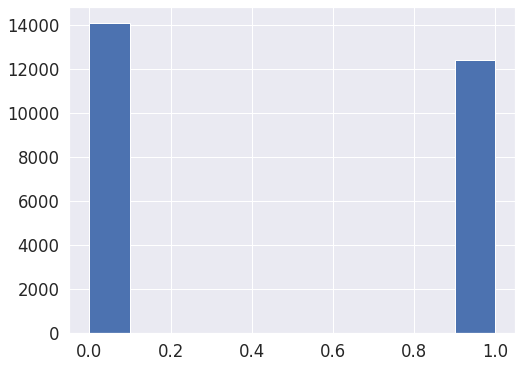

In [30]:
#observo la distribucion de los registros sin nans
raintomorrow = dataset_not_nans.binary_rain_tomorrow.to_numpy()
fig, ax = plt.subplots(1,figsize=(8,6))
ax.hist(raintomorrow)

**Conclusion**: 
¿Qué supuestos puede realizar acerca de los datos faltantes? Solo teniendo en cuenta las filas sin nans, la distribucion no sufre un desbalanceo abrupto. Podria utilizar el dataset_not_nans para el entrenamiento.

In [31]:
#Tratamiento de NaNs
df_downsampled["MinTemp"]= df_downsampled["MinTemp"].fillna(df_downsampled["MinTemp"].mean())
df_downsampled["MaxTemp"]= df_downsampled["MaxTemp"].fillna(df_downsampled["MaxTemp"].mean())
df_downsampled["Evaporation"]= df_downsampled["Evaporation"].fillna(df_downsampled["Evaporation"].mean())
df_downsampled["Sunshine"]= df_downsampled["Sunshine"].fillna(df_downsampled["Sunshine"].mean())
df_downsampled["WindGustSpeed"]= df_downsampled["WindGustSpeed"].fillna(df_downsampled["WindGustSpeed"].mean())
df_downsampled["Rainfall"]= df_downsampled["Rainfall"].fillna(df_downsampled["Rainfall"].mean())
df_downsampled["WindSpeed9am"]= df_downsampled["WindSpeed9am"].fillna(df_downsampled["WindSpeed9am"].mean())
df_downsampled["WindSpeed3pm"]= df_downsampled["WindSpeed3pm"].fillna(df_downsampled["WindSpeed3pm"].mean())
df_downsampled["Humidity9am"]= df_downsampled["Humidity9am"].fillna(df_downsampled["Humidity9am"].mean())
df_downsampled["Humidity3pm"]= df_downsampled["Humidity3pm"].fillna(df_downsampled["Humidity3pm"].mean())
df_downsampled["Pressure9am"]= df_downsampled["Pressure9am"].fillna(df_downsampled["Pressure9am"].mean())
df_downsampled["Pressure3pm"]= df_downsampled["Pressure3pm"].fillna(df_downsampled["Pressure3pm"].mean())
df_downsampled["Cloud9am"]= df_downsampled["Cloud9am"].fillna(df_downsampled["Cloud9am"].mean())
df_downsampled["Cloud3pm"]= df_downsampled["Cloud3pm"].fillna(df_downsampled["Cloud3pm"].mean())
df_downsampled["Temp9am"]= df_downsampled["Temp9am"].fillna(df_downsampled["Temp9am"].mean())
df_downsampled["Temp3pm"]= df_downsampled["Temp3pm"].fillna(df_downsampled["Temp3pm"].mean())
df_downsampled['RainToday']=df_downsampled['RainToday'].fillna(df_downsampled['RainToday'].mode()[0])
df_downsampled['RainTomorrow']=df_downsampled['RainTomorrow'].fillna(df_downsampled['RainTomorrow'].mode()[0])
df_downsampled['WindDir9am'] = df_downsampled['WindDir9am'].fillna(df_downsampled['WindDir9am'].mode()[0])
df_downsampled['WindGustDir'] = df_downsampled['WindGustDir'].fillna(df_downsampled['WindGustDir'].mode()[0])
df_downsampled['WindDir3pm'] = df_downsampled['WindDir3pm'].fillna(df_downsampled['WindDir3pm'].mode()[0])

In [32]:
nans = df_downsampled.loc[df_downsampled.isna().sum(axis=1) >= 1, :]
print('Cantidad de filas con nans {}'.format(nans.shape))

not_nans = df_downsampled.loc[df_downsampled.isna().sum(axis=1) == 0, :]
print('Cantidad de filas sin nans {}'.format(not_nans.shape))

dataset_not_nans = not_nans

Cantidad de filas con nans (0, 26)
Cantidad de filas sin nans (70288, 26)


# Ingeniería de features básica

In [33]:
dataset_not_nans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70288 entries, 39427 to 145459
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  70288 non-null  object        
 1   Location              70288 non-null  object        
 2   MinTemp               70288 non-null  float64       
 3   MaxTemp               70288 non-null  float64       
 4   Rainfall              70288 non-null  float64       
 5   Evaporation           70288 non-null  float64       
 6   Sunshine              70288 non-null  float64       
 7   WindGustDir           70288 non-null  object        
 8   WindGustSpeed         70288 non-null  float64       
 9   WindDir9am            70288 non-null  object        
 10  WindDir3pm            70288 non-null  object        
 11  WindSpeed9am          70288 non-null  float64       
 12  WindSpeed3pm          70288 non-null  float64       
 13  Humidity9am

In [34]:
dataset_not_nans.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_dat,Month,binary_rain_tomorrow
39427,2017-03-07,WaggaWagga,14.9,29.3,0.0,7.800000,6.591708,NE,41.0,ENE,SE,22.0,7.0,50.000000,20.000000,1017.7,1015.2,4.997273,5.126974,19.5,27.9,No,No,2017-03-07,3,0
91344,2012-01-09,GoldCoast,23.8,31.4,0.0,5.186176,6.591708,N,44.0,N,NNE,22.0,35.0,63.000000,71.000000,1007.3,1003.2,4.997273,5.126974,27.4,28.1,No,No,2012-01-09,1,0
83234,2015-05-15,Dartmoor,9.1,13.6,1.4,0.200000,2.900000,SSE,24.0,SSW,SSE,6.0,11.0,71.721595,56.957038,1038.9,1036.9,4.997273,5.126974,10.7,12.3,Yes,No,2015-05-15,5,0
138239,2015-02-05,AliceSprings,15.4,33.9,0.0,13.600000,12.800000,ESE,35.0,E,E,15.0,13.0,24.000000,19.000000,1012.7,1009.6,0.000000,1.000000,26.7,32.2,No,No,2015-02-05,2,0
48271,2015-06-05,Canberra,-0.8,14.0,1.0,5.186176,6.591708,NW,19.0,N,WNW,0.0,9.0,91.000000,47.000000,1020.9,1021.0,7.000000,5.126974,4.8,13.8,No,No,2015-06-05,6,0


In [35]:
# Como solo hay 2 clases en la columna RainToday, la transformo usando one hot encoding

type_dummies_rain_today= pd.get_dummies(dataset_not_nans.RainToday, prefix='raintoday')
#type_dummies_location= pd.get_dummies(df_downsampled.Location, prefix='Location_')
dataset_not_nans = pd.concat([dataset_not_nans, type_dummies_rain_today], axis=1)
print(dataset_not_nans.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 70288 entries, 39427 to 145459
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  70288 non-null  object        
 1   Location              70288 non-null  object        
 2   MinTemp               70288 non-null  float64       
 3   MaxTemp               70288 non-null  float64       
 4   Rainfall              70288 non-null  float64       
 5   Evaporation           70288 non-null  float64       
 6   Sunshine              70288 non-null  float64       
 7   WindGustDir           70288 non-null  object        
 8   WindGustSpeed         70288 non-null  float64       
 9   WindDir9am            70288 non-null  object        
 10  WindDir3pm            70288 non-null  object        
 11  WindSpeed9am          70288 non-null  float64       
 12  WindSpeed3pm          70288 non-null  float64       
 13  Humidity9am

In [36]:
dataset_not_nans.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_dat,Month,binary_rain_tomorrow,raintoday_No,raintoday_Yes
39427,2017-03-07,WaggaWagga,14.9,29.3,0.0,7.800000,6.591708,NE,41.0,ENE,SE,22.0,7.0,50.000000,20.000000,1017.7,1015.2,4.997273,5.126974,19.5,27.9,No,No,2017-03-07,3,0,1,0
91344,2012-01-09,GoldCoast,23.8,31.4,0.0,5.186176,6.591708,N,44.0,N,NNE,22.0,35.0,63.000000,71.000000,1007.3,1003.2,4.997273,5.126974,27.4,28.1,No,No,2012-01-09,1,0,1,0
83234,2015-05-15,Dartmoor,9.1,13.6,1.4,0.200000,2.900000,SSE,24.0,SSW,SSE,6.0,11.0,71.721595,56.957038,1038.9,1036.9,4.997273,5.126974,10.7,12.3,Yes,No,2015-05-15,5,0,0,1
138239,2015-02-05,AliceSprings,15.4,33.9,0.0,13.600000,12.800000,ESE,35.0,E,E,15.0,13.0,24.000000,19.000000,1012.7,1009.6,0.000000,1.000000,26.7,32.2,No,No,2015-02-05,2,0,1,0
48271,2015-06-05,Canberra,-0.8,14.0,1.0,5.186176,6.591708,NW,19.0,N,WNW,0.0,9.0,91.000000,47.000000,1020.9,1021.0,7.000000,5.126974,4.8,13.8,No,No,2015-06-05,6,0,1,0


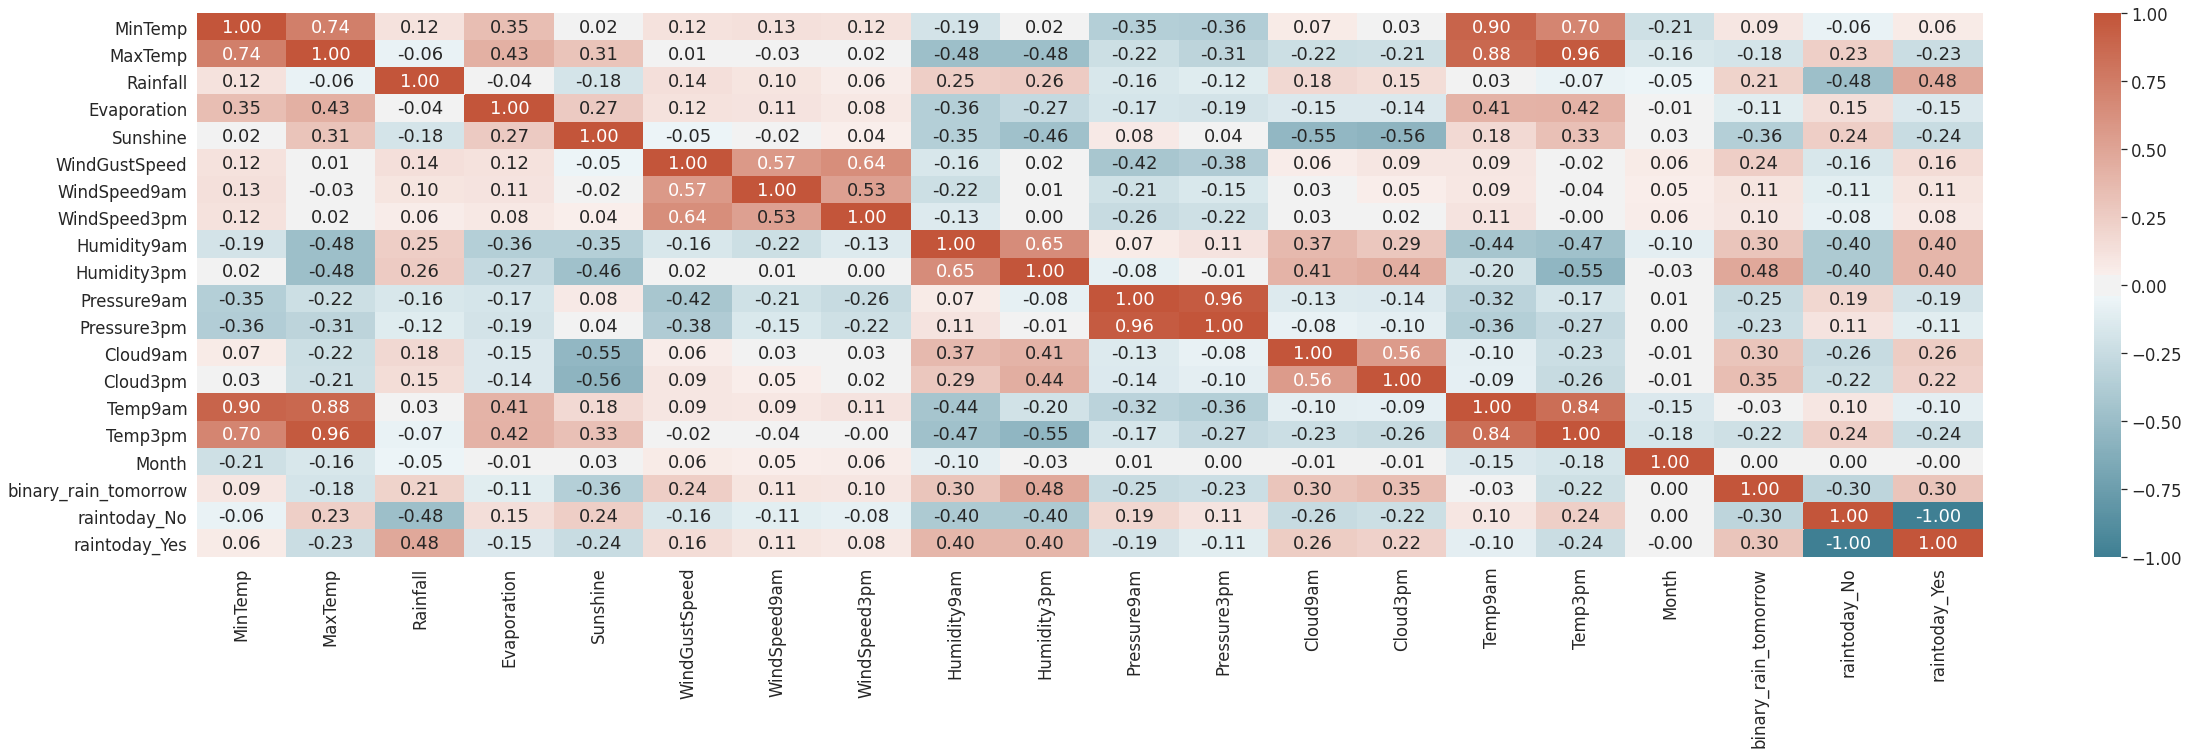

In [37]:
#Realizo un analisis de las correlaciones entre las variables para entender las variables de entrada de mayor importancia 
fig, ax1 = plt.subplots(1, figsize=(40, 10)) 
corr = dataset_not_nans.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(220, 20, as_cmap=True), annot=True, fmt=".2f") 
sns.set(font_scale=1.5)

In [38]:
# remover las columnas que no vamos a usar
dataset_not_nans = dataset_not_nans.drop(['WindGustDir','WindDir9am','WindDir3pm','RainTomorrow','RainToday','Date_dat','Date','Month','Location'], axis=1, inplace=False)
print(dataset_not_nans.info())

dataset_not_nans.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70288 entries, 39427 to 145459
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MinTemp               70288 non-null  float64
 1   MaxTemp               70288 non-null  float64
 2   Rainfall              70288 non-null  float64
 3   Evaporation           70288 non-null  float64
 4   Sunshine              70288 non-null  float64
 5   WindGustSpeed         70288 non-null  float64
 6   WindSpeed9am          70288 non-null  float64
 7   WindSpeed3pm          70288 non-null  float64
 8   Humidity9am           70288 non-null  float64
 9   Humidity3pm           70288 non-null  float64
 10  Pressure9am           70288 non-null  float64
 11  Pressure3pm           70288 non-null  float64
 12  Cloud9am              70288 non-null  float64
 13  Cloud3pm              70288 non-null  float64
 14  Temp9am               70288 non-null  float64
 15  Temp3pm       

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,binary_rain_tomorrow,raintoday_No,raintoday_Yes
39427,14.9,29.3,0.0,7.800000,6.591708,41.0,22.0,7.0,50.000000,20.000000,1017.7,1015.2,4.997273,5.126974,19.5,27.9,0,1,0
91344,23.8,31.4,0.0,5.186176,6.591708,44.0,22.0,35.0,63.000000,71.000000,1007.3,1003.2,4.997273,5.126974,27.4,28.1,0,1,0
83234,9.1,13.6,1.4,0.200000,2.900000,24.0,6.0,11.0,71.721595,56.957038,1038.9,1036.9,4.997273,5.126974,10.7,12.3,0,0,1
138239,15.4,33.9,0.0,13.600000,12.800000,35.0,15.0,13.0,24.000000,19.000000,1012.7,1009.6,0.000000,1.000000,26.7,32.2,0,1,0
48271,-0.8,14.0,1.0,5.186176,6.591708,19.0,0.0,9.0,91.000000,47.000000,1020.9,1021.0,7.000000,5.126974,4.8,13.8,0,1,0


In [39]:
x = dataset_not_nans.drop('binary_rain_tomorrow',axis = 1)
y = dataset_not_nans['binary_rain_tomorrow']

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3)

In [41]:
# normalizar los datos para que vayan entre 0 y 1

min_max_scaler = preprocessing.MinMaxScaler()

x_train_norm = min_max_scaler.fit_transform(x_train)

x_test_norm = min_max_scaler.transform(x_test)

print(x_train_norm.min())
print(x_train_norm.max())

print(x_test_norm.min())
print(x_test_norm.max())

0.0
1.0
-0.010101010101010102
1.125


# Modelo base




In [42]:
class RandomModel(object):

    def fit(self, X, y):
        return None

    def predict(self, X):
        return np.random.randint(0,1, size=X.shape[0])

In [43]:
random_model = RandomModel()
random_model.fit(x_train_norm, y_train)
rm_predictions = random_model.predict(x_test_norm)

In [44]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, rm_predictions)
roc_auc = metrics.auc(fpr, tpr)
print(metrics.auc(fpr, tpr))

0.5


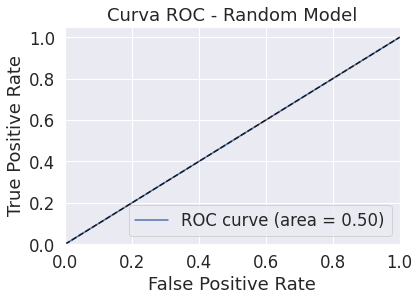

In [45]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Random Model')
plt.legend(loc="lower right")
plt.show()

# Regresión logística



In [46]:
lr_model = LogisticRegression(C=1, solver='sag', max_iter=1000)
lr_model.fit(x_train_norm, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
lr_prediction = lr_model.predict(x_test_norm)
fpr, tpr, thresholds = metrics.roc_curve(y_test, lr_prediction)
roc_auc = metrics.auc(fpr, tpr)
print(metrics.auc(fpr, tpr))

0.7594287712998119


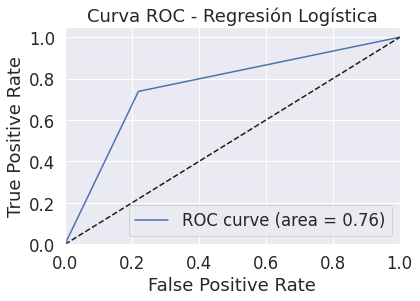

In [48]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Regresión Logística')
plt.legend(loc="lower right")
plt.show()

# Random forest





In [49]:
# Random forest, con datos normalizados

rf_model = RandomForestClassifier(n_estimators=1000, max_depth=None, random_state=0)
rf_model.fit(x_train_norm, y_train)

rf_pred = rf_model.predict(x_test_norm)
fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_pred)
roc_auc = metrics.auc(fpr, tpr)
metrics.auc(fpr, tpr)



0.795901023366866

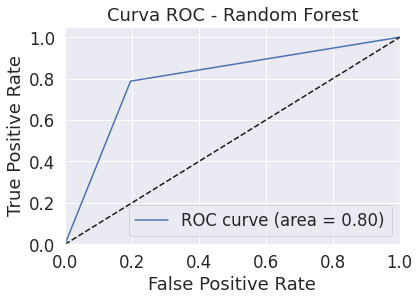

In [50]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Random Forest')
plt.legend(loc="lower right")
plt.show()

#Deep learning 


In [52]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [53]:
tf.config.list_physical_devices('GPU') 

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [55]:

def create_model():
  # create model
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(100))
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Dense(1))
  model.add(tf.keras.layers.Activation('sigmoid'))

  return model

model = create_model()

metrics = [tf.keras.metrics.AUC()]

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=metrics
)

model.fit(
    x_train_norm.astype(np.float32), 
    y_train.astype(np.float32),
    epochs=20,
    batch_size=64,
    validation_data=(x_test_norm, y_test),
)





Epoch 1/20
769/769 [==============================] - 3s 4ms/step - loss: 0.5033 - auc_1: 0.8325 - val_loss: 0.4967 - val_auc_1: 0.8408
Epoch 2/20
769/769 [==============================] - 3s 3ms/step - loss: 0.4930 - auc_1: 0.8406 - val_loss: 0.5064 - val_auc_1: 0.8424
Epoch 3/20
769/769 [==============================] - 3s 3ms/step - loss: 0.4896 - auc_1: 0.8430 - val_loss: 0.4929 - val_auc_1: 0.8439
Epoch 4/20
769/769 [==============================] - 3s 3ms/step - loss: 0.4858 - auc_1: 0.8458 - val_loss: 0.4871 - val_auc_1: 0.8461
Epoch 5/20
769/769 [==============================] - 3s 3ms/step - loss: 0.4815 - auc_1: 0.8489 - val_loss: 0.4789 - val_auc_1: 0.8501
Epoch 6/20
769/769 [==============================] - 3s 3ms/step - loss: 0.4794 - auc_1: 0.8505 - val_loss: 0.4743 - val_auc_1: 0.8533
Epoch 7/20
769/769 [==============================] - 3s 3ms/step - loss: 0.4752 - auc_1: 0.8534 - val_loss: 0.4751 - val_auc_1: 0.8562
Epoch 8/20
769/769 [============================

In [56]:
y_pred_keras = model.predict(x_test_norm,batch_size=64).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)


In [57]:
auc_keras = auc(fpr_keras, tpr_keras)

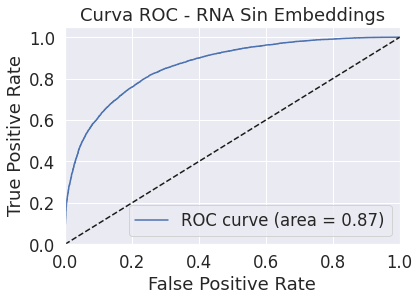

In [58]:
plt.figure()
plt.plot(fpr_keras, tpr_keras, label='ROC curve (area = %0.2f)' % auc_keras)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - RNA Sin Embeddings')
plt.legend(loc="lower right")
plt.show()